In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
db = pd.read_csv("winequality-red.csv")

In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: >

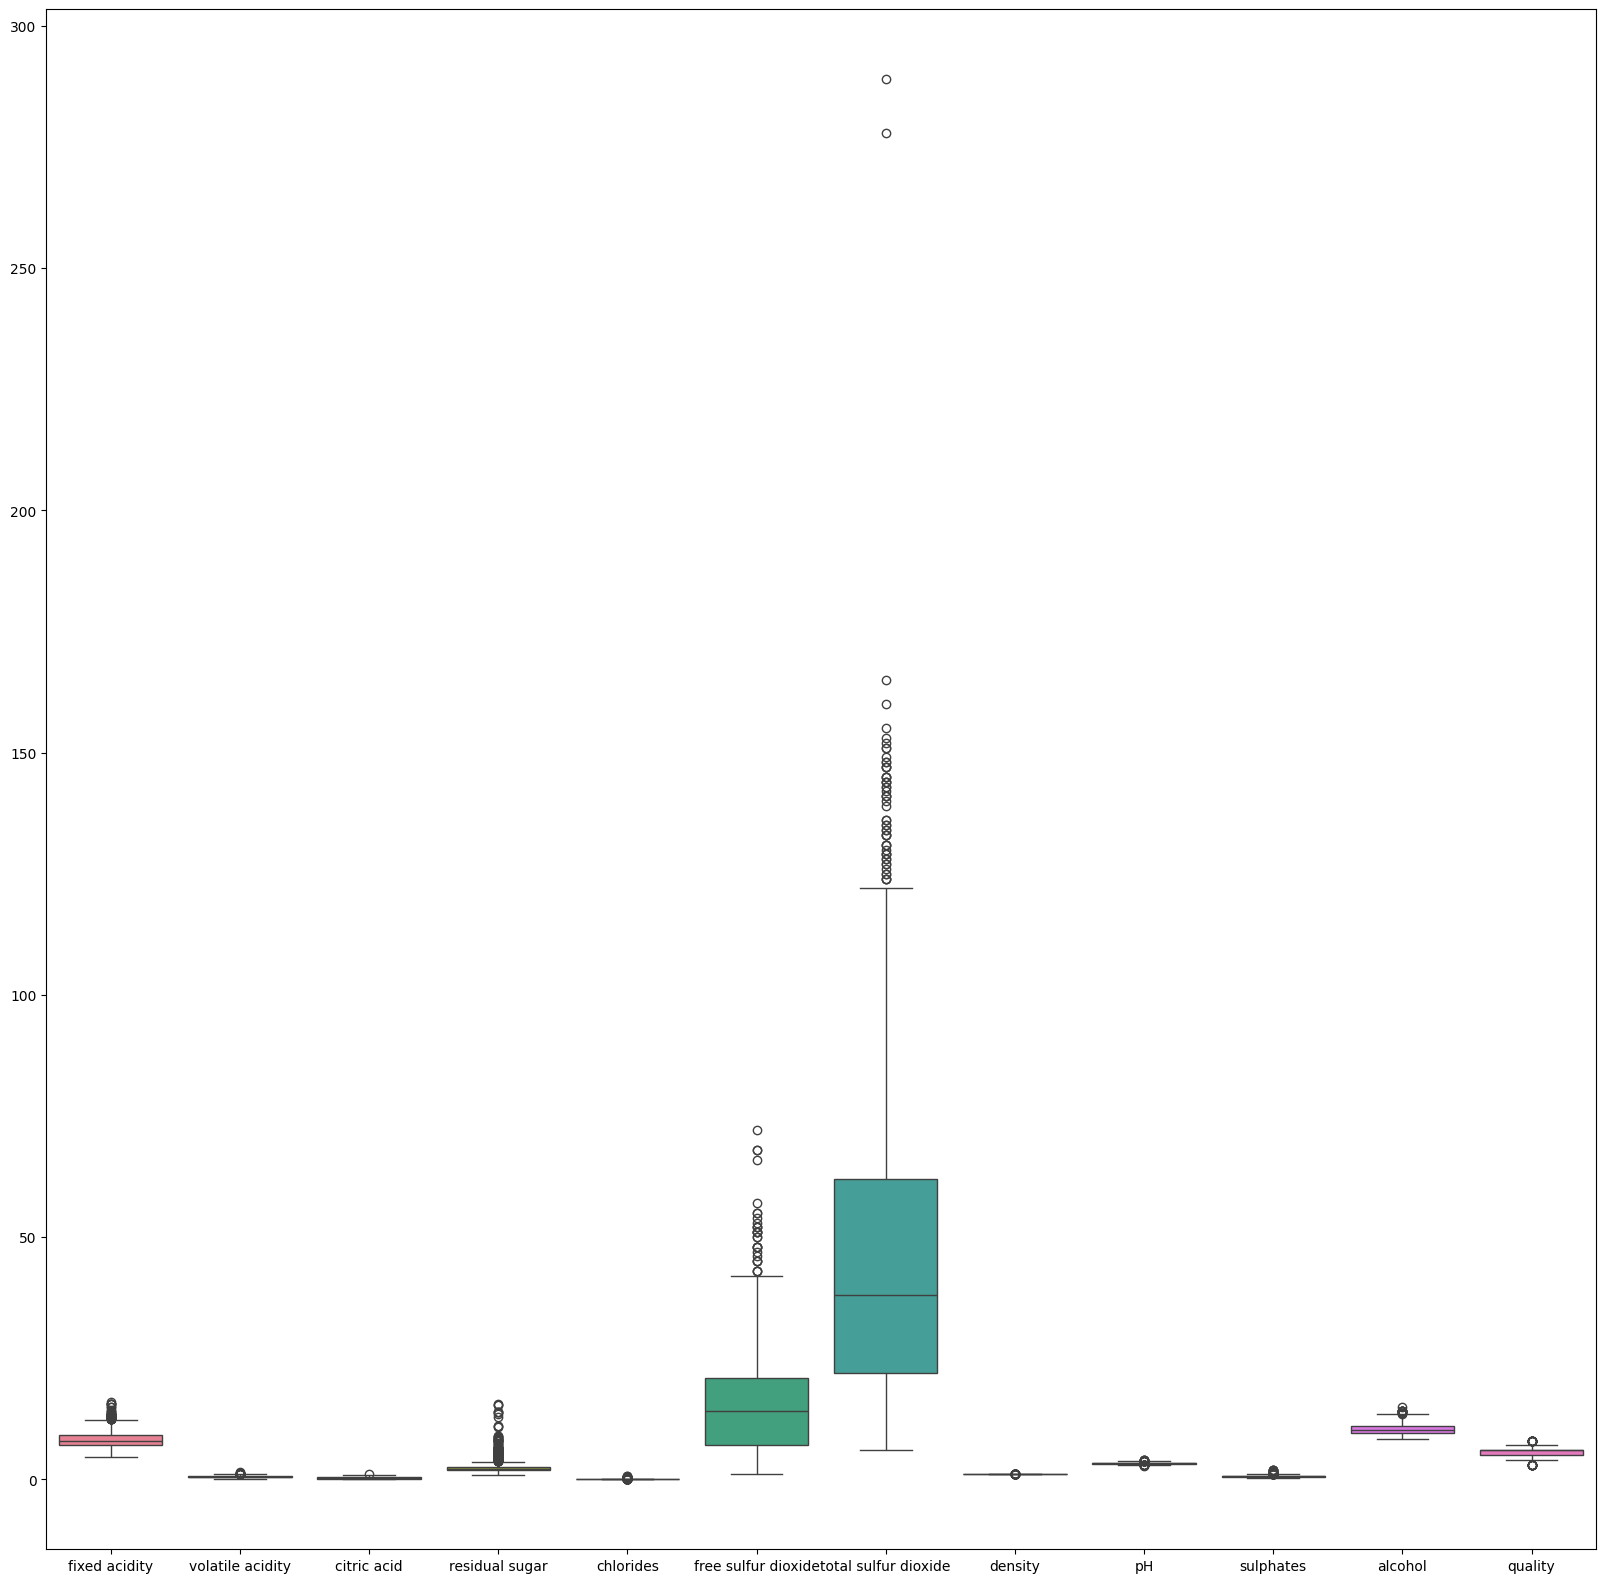

In [4]:
plt.figure(figsize = (20,20))
sns.boxplot(db)

In [5]:
db.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
def outlierRemover(data):
    column = np.array(data)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.7)
    IQR = Q3-Q1
    low = Q1-1.5*IQR
    upp = Q3+1.5*IQR
    outliers = []
    for i in column:
        if(i<low or i>upp):
            outliers.append(i)

    return outliers

In [7]:
for i in db.columns:
    outliers = outlierRemover(db[i])
    db[i] = db[i].replace(outliers,db[i].median())

<Axes: >

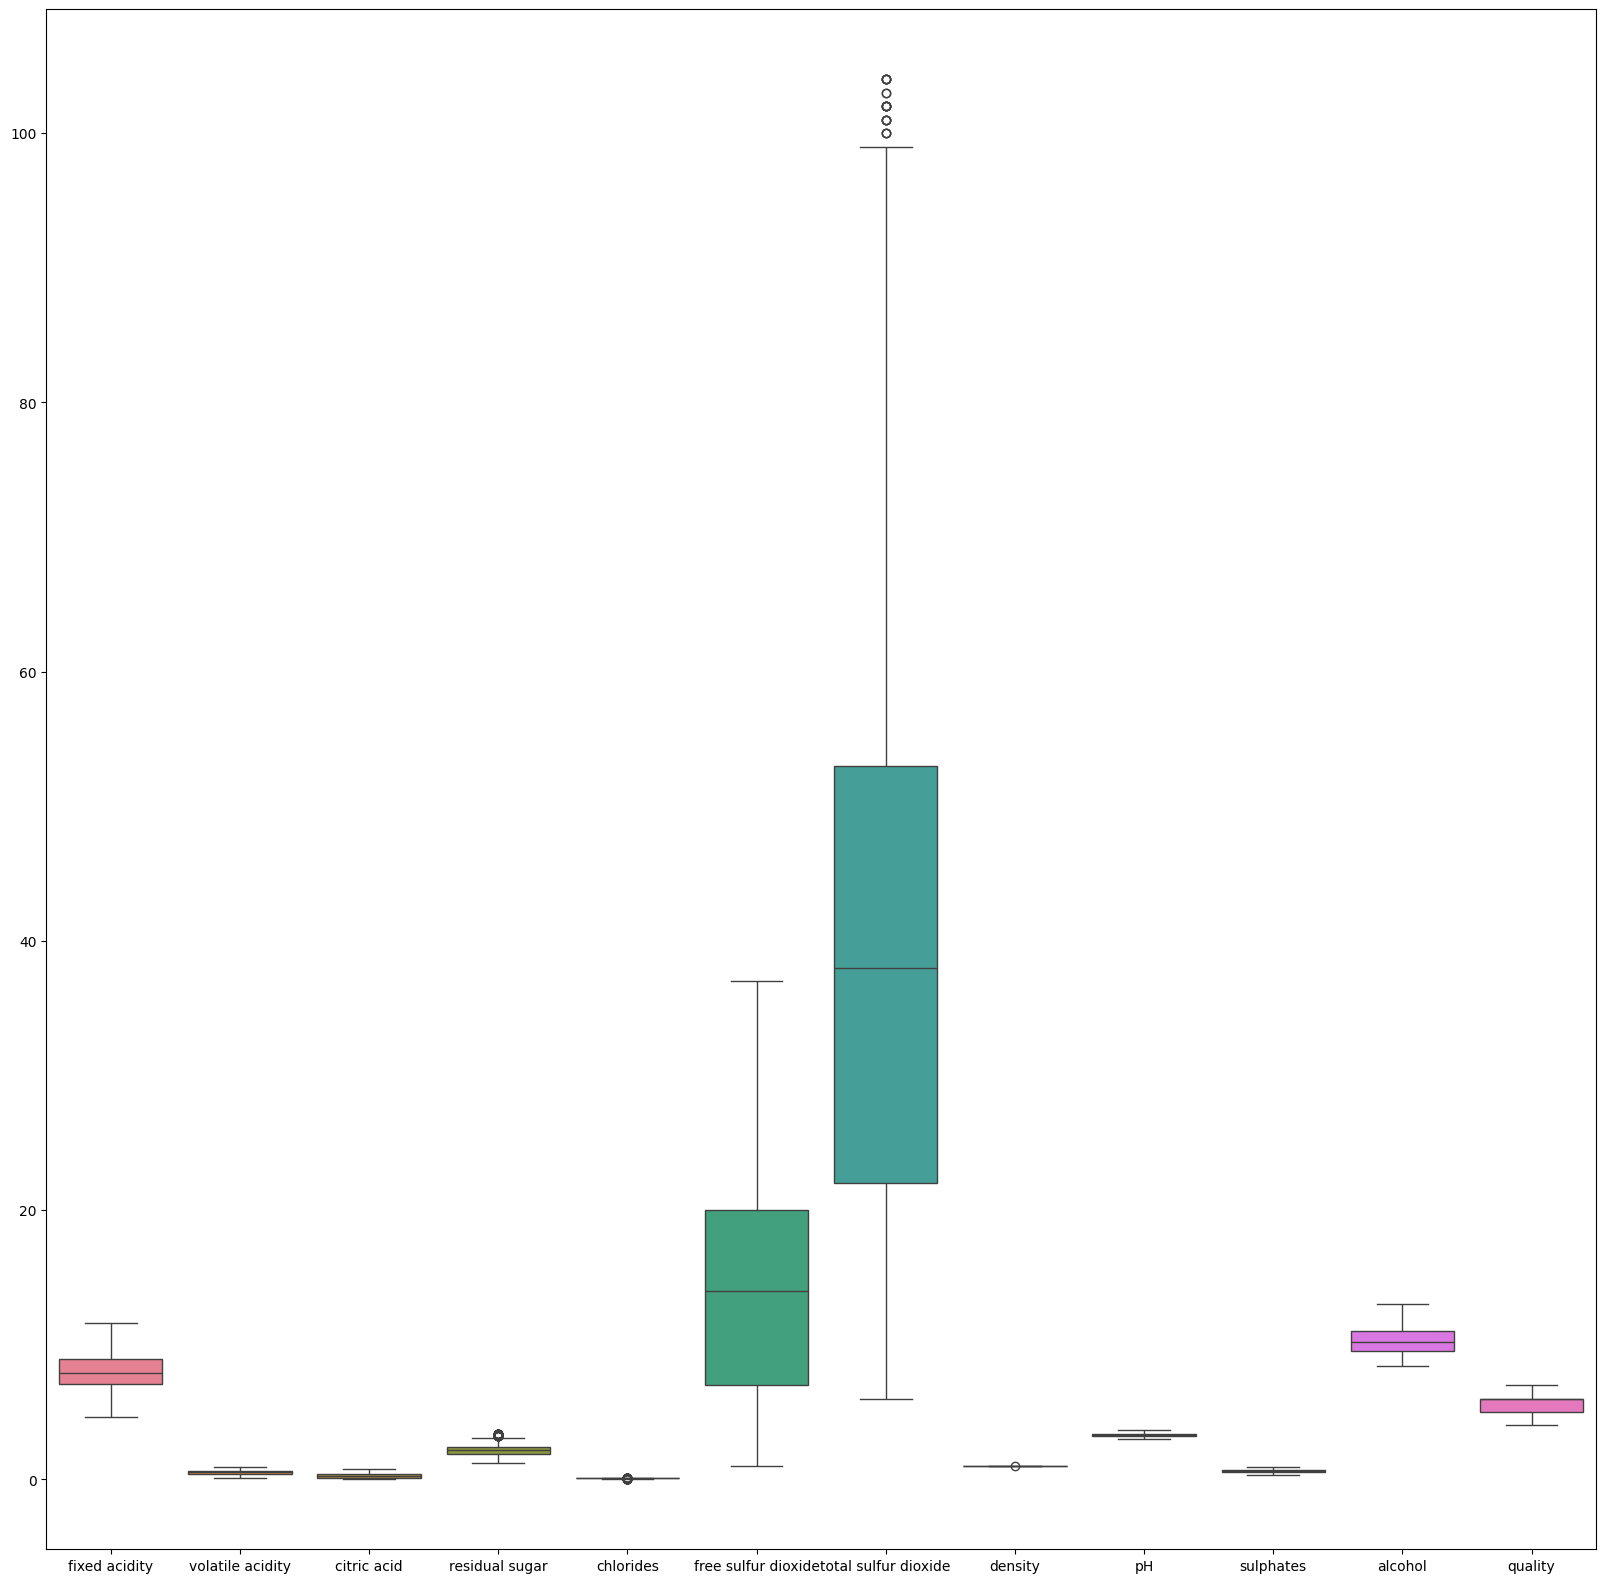

In [8]:
plt.figure(figsize = (20,20))
sns.boxplot(db)

In [9]:
X_ = db.drop(["quality"],axis=1)
Y_ = db["quality"]

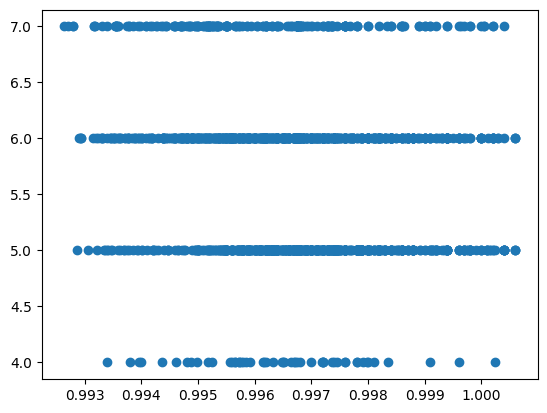

In [26]:
plt.scatter(X_.density,Y_)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X_,Y_,random_state=42,test_size=0.2)

In [11]:
def normalize(col):
    col=np.array(col)
    m=np.mean(col)
    s=np.std(col)
    for i in range(col.shape[0]):
        col[i]=(col[i]-m)/s
    return col

In [12]:
for i in x_train.columns:
    x_train[i]=normalize(x_train[i])
for i in x_test.columns:
    x_test[i]=normalize(x_test[i])

<Axes: >

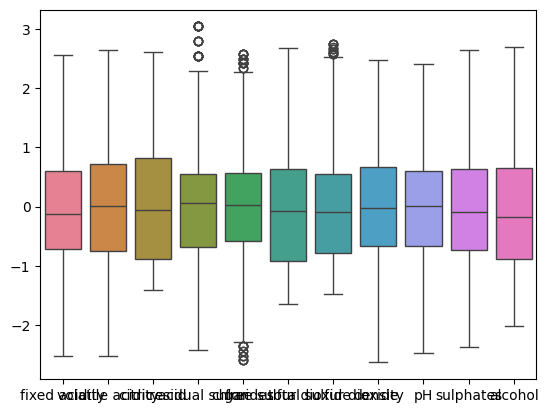

In [13]:
sns.boxplot(x_train)

In [14]:
L = 0.1
epochs = 1000
weights = None
bias = None

In [15]:
def train(X,y):
    n,m = X.shape
    weights = np.ones(m)
    bias = 1

    for i in range(epochs):
        yPredict = np.dot(X,weights)+bias
        dw = 1/n *np.dot(X.T,(yPredict-y))
        db = 1/n *np.sum(yPredict-y)
        weights -= L*dw
        bias -= L*db
        cost = 1/(2*n)*np.sum(np.power((yPredict-y),2))
        if(i % 100 == 0):
                print("Epoch ",i," Cost:", "%.4f" % cost)
    return weights, bias

In [16]:
def predict(X,weights,bias):
    yPredict = np.dot(X,weights)+bias
    return yPredict

In [17]:
y_train = np.array(y_train)
x_train = np.array(x_train)

In [18]:
weights,bias = train(x_train,y_train)

Epoch  0  Cost: 17.7152
Epoch  100  Cost: 0.1816
Epoch  200  Cost: 0.1810
Epoch  300  Cost: 0.1810
Epoch  400  Cost: 0.1810
Epoch  500  Cost: 0.1810
Epoch  600  Cost: 0.1810
Epoch  700  Cost: 0.1810
Epoch  800  Cost: 0.1810
Epoch  900  Cost: 0.1810


In [19]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [20]:
yPredict = predict(x_test,weights,bias)

In [21]:
r2score = r2_score(y_test,yPredict) * 100

In [22]:
r2score

37.902269203018676